<a href="https://colab.research.google.com/github/Aitor1411/AR-PCB/blob/main/src/04_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

project_path = 'PHM_tutorial'

if not os.path.isdir(project_path):

  username = 'klopetx'
  repo = project_path

  !git clone https://@github.com/{username}/{repo}

os.chdir(project_path)

!python src/00_Environment_Checks.py

indicator_file_path = "data/indicators.csv"

if not os.path.isdir(project_path):
  print('Indicator dataset not found, extracting indicators...')
  !python src/01_Indicator_extraction.py
  print('Indicators extracted succesfully!')


Cloning into 'PHM_tutorial'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 203 (delta 40), reused 0 (delta 0), pack-reused 128 (from 1)
Receiving objects: 100% (203/203), 4.42 MiB | 6.32 MiB/s, done.
Resolving deltas: 100% (106/106), done.
The '10. FEMTO Bearing' directory does not exist inside 'data'
Runnning data download...
FEMTO downloaded
Indicator dataset not found, extracting indicators...
Indicators extracted succesfully!


# Modelling

After carrying out the acquisition, the feature extraction and the selection, it is time to build a model.

As we have seen in the slides, there are different approaches we might take which, **most of the times it is not about what we want to do** but about **what we can do with the data we have at hand**.  

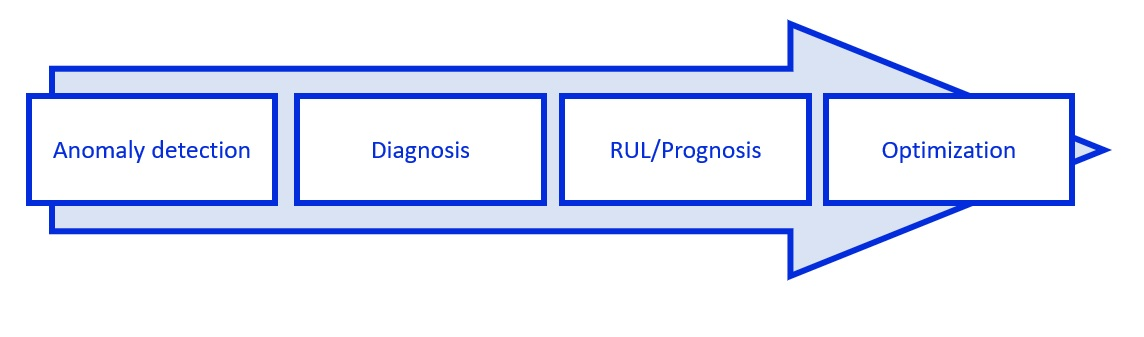


## Questions
Given the dataset we have been working with. In each question, justify the answer in relation to the data available an how it should be treated in order to have the right data to solve the problem.

How would you codify the data?

1. Do you think we could carry out **an anomaly detection model**? (Justify your answer)

2. Do you think we could carry out **a diagnosis model**? Of which kind?

3. A **Remaining Useful Life model**?

4. An **optimization model**?





# Remaining Useful Life

As we saw in the previous notebook, our data extraction process has been oriented towards the developmento of a Remaining Useful Life model.
This type of model would provide us an estimation of the time left until the machine is no longer operating at any time we request that information.

For computing the RUL we need some run-to-failure examples. That is, data taken trhough the whole life of the machine that reflects how the signals evolved till the machine is no longer operable.

Luckily for you, you have a dataset ready for building a Remaining Useful Life computation.

This time, we will:

0) Visualize how RUL behaves

1) Split the data

2) Train a model (Linear Regression could be a good start)

3) Plot the results over the




In [2]:
import pandas as pd
indicators = pd.read_csv('data/indicators.csv', sep = '\t')


## RUL behaviour

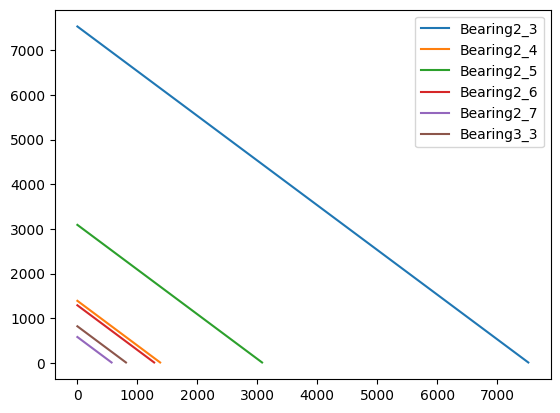

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

indicators = indicators[indicators.Alive == True].copy()

groups = indicators.groupby('Bearing')

for name, group in groups:
    plt.plot(group['Duration'],group['RUL'], label=name)

plt.legend()
plt.show()


In [ ]:
indicators.columns

Index(['Origin', 'Bearing', 'OperatingCondition', 'TestNumber', 'TestIdx',
       'Hour', 'Minute', 'Second', 'Mili/centisecond', 'Mean',
       'Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Skewness',
       'Kurtosis', 'Crest Factor', 'Form Factor', 'Impulse Factor',
       'Margin Factor', 'Total Energy', 'Max Power Frequency',
       'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
       'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms',
       'BSF_max', 'BSF_rms', 'Timestamp', 'Duration', 'Actual_RUL', 'RUL',
       'Alive'],
      dtype='object')

## Spliting the data

To ensure our model has some predictive power, let's split first the data, if we leave some data "unseen" so that we can validate later that the model "generalises" well.
Bearing in mind what information you want the model to be able to see!



Things you need to do:
- Select the variables to be used in the partitioning
- Create train and test partition

Useful commands:
- pd.columns
- pd.head
- pd.iloc and pd.loc
- sikitlearn [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)



In [4]:
import numpy as np

from sklearn.model_selection import train_test_split

actual_indicators = ['Mean',
       'Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Skewness',
       'Kurtosis', 'Crest Factor', 'Form Factor', 'Impulse Factor',
       'Margin Factor', 'Total Energy', 'Max Power Frequency',
       'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
       'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms',
       'BSF_max', 'BSF_rms']

target_variable = ['RUL']

In [9]:
# prompt: Select the variables to be used in the partitioning

X = indicators[actual_indicators]
X.head()



,Mean,Standard Deviation,RMS,Peak,Peak-to-Peak,Skewness,Kurtosis,Crest Factor,Form Factor,Impulse Factor,...,Spectral Centroid,Spectral Bandwidth,Spectral Flatness,Spectral Roll-off,BPFO_max,BPFO_rms,BPFI_max,BPFI_rms,BSF_max,BSF_rms
0,0.006552,0.341202,0.341264,1.142,2.272,0.051280,0.033186,3.346378,1.260168,4.217001,...,3264.183946,1913.956710,-7.961653,4520.0,4.478474,3.462482,2.702957,2.455653,15.180564,13.488451
1,0.001299,0.318229,0.318232,1.098,2.178,0.075415,0.015628,3.450318,1.250507,4.314646,...,3435.415092,2069.869338,-7.217908,5160.0,6.817578,5.925823,5.629765,4.592479,18.305801,13.007734
2,0.003271,0.326795,0.326811,1.247,2.333,0.062380,0.208370,3.815656,1.266538,4.832675,...,3187.168391,2064.430632,-7.633558,4790.0,4.653304,3.938765,6.103561,4.583218,9.434037,8.430699
3,0.003263,0.347232,0.347247,1.147,2.179,0.002695,-0.177687,3.303124,1.237778,4.088534,...,3586.623873,2018.803340,-7.532386,5260.0,3.219246,2.652722,6.837217,6.077246,13.578691,10.908141
4,0.004246,0.351220,0.351245,1.572,2.860,-0.021161,0.318689,4.475503,1.268576,5.677516,...,3380.191128,1928.736549,-8.284707,4760.0,3.806821,3.710252,8.133538,6.903766,12.933754,9.514291


In [13]:
# Select the indicators for the training, select target variable
Y = indicators[target_variable]
Y.head()




,RUL
0,1390.0
1,1380.0
2,1370.0
3,1360.0
4,1350.0


In [15]:
# Create a train test partitioning
X_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## Building a model

The backbone of our RUL estimation is a data-based model.

This  model should take indicators as inputs and be able to provide an estimation of the RUL.

I would suggest to use a multiple linear regression. You can check [sikitlearn's docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#examples-using-sklearn-linear-model-linearregression) for more details.

In [28]:
# prompt: # Import the model
# # Fit the model
# # check the score

from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Check the score of the model on the test data
score = model.score(X_test, Y_test)
print(f"Model R^2 score on the test set: {score}")


Model R^2 score on the test set: 0.39298600596730116


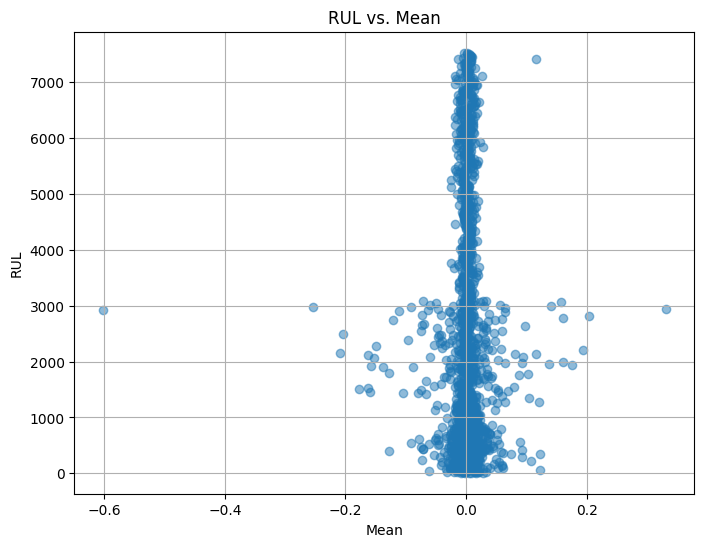

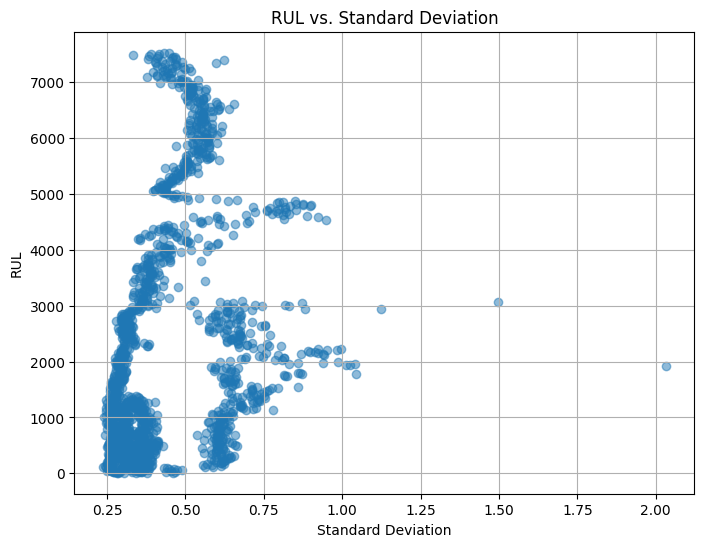

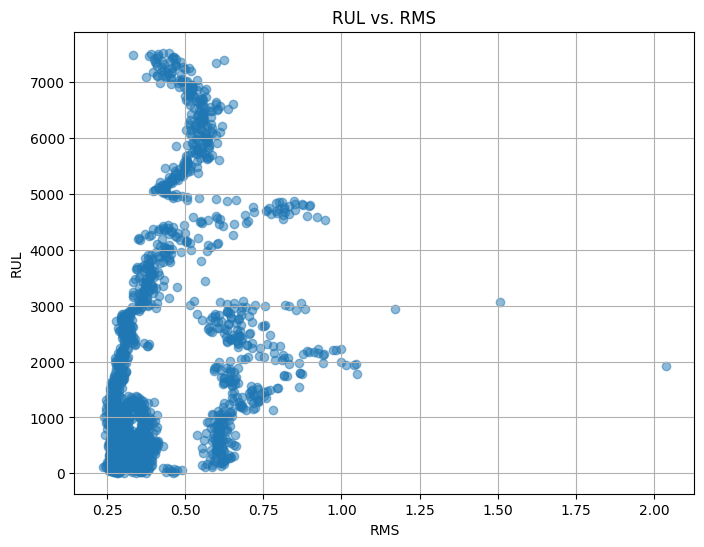

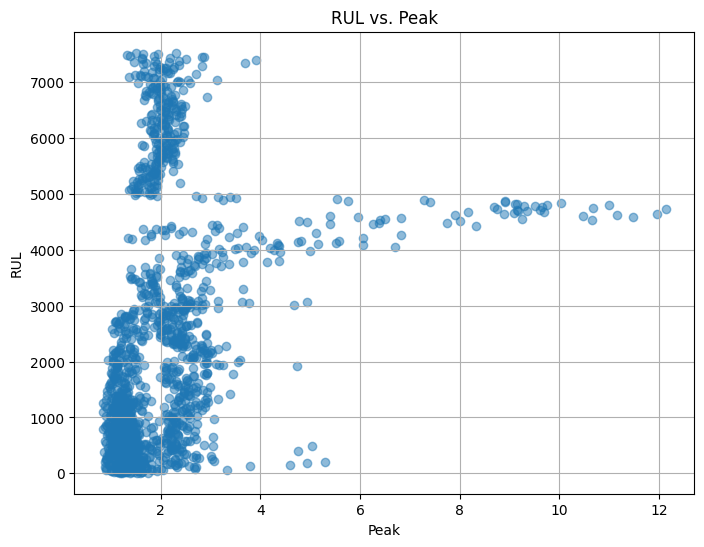

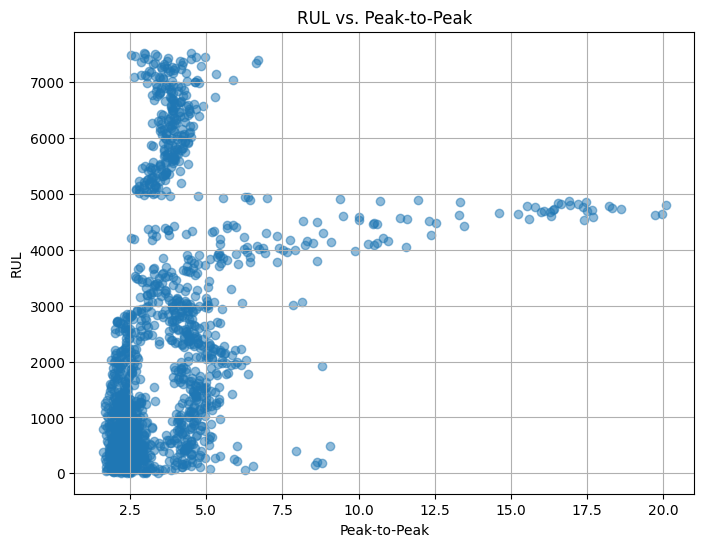

In [30]:
# prompt: graficar con puntos

import matplotlib.pyplot as plt

# Assuming 'indicators' DataFrame and 'actual_indicators' list are defined as in the provided code.

# Select a subset of indicators for visualization (e.g., the first 5)
selected_indicators = actual_indicators[:5]

# Create the scatter plot
for indicator in selected_indicators:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.scatter(indicators[indicator], indicators['RUL'], alpha=0.5) # alpha for transparency
    plt.xlabel(indicator)
    plt.ylabel('RUL')
    plt.title(f'RUL vs. {indicator}')
    plt.grid(True)  # Add a grid for better readability
    plt.show()


## Model validation

Now use the model you trained over the unseen data and visualize the results.
How good is the RUL model?

In [ ]:

# Use the model to predict in the test set


# Compare the predictions against the actual values: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html




In [ ]:
# Create a plot with actual test values vs predicted test values
